# Excersise 3 - Rejection Sampling

In [140]:
# Mira Kuntz 2022
# Rejection Sampling Algorithm

import numpy as np
import random
from typing import Callable
import matplotlib.pyplot as plt
from scipy.stats import norm

class RejectionSampling:
    def __init__(self, targetSampleSize: int, sample: list[float], f_density: Callable, g_density: Callable, M: float):
        self.targetSampleSize = targetSampleSize
        self.f = f_density
        self.g = g_density
        self.M = M
        self.sample = sample
        self.targetSamples = []
    

    def rejectionSampling (self):
        for X in self.sample:
            U = random.uniform(0,1)
            if U < g(X)/(M*f(X)):
                self.targetSamples.append(X)
            if len(self.targetSamples) == self.targetSampleSize:
                break

    def makeNegative (self):
        self.targetSamples[:] = [x*(-1) if random.randint(0,1) == 1 else x for x in self.targetSamples]

## We will use the function to generate 100 samples

In [141]:
g = lambda x: np.exp(-(x**2/2))/np.sqrt(2*np.pi)
f = lambda x: np.exp(-x)/2
target = 100
sample = np.random.exponential(scale=1, size=3*target)
M = 1.5
distr = RejectionSampling(target, sample, f, g, M)
distr.rejectionSampling()
distr.makeNegative()

## Let's Plot the results and compare to the library-generated normal CDF

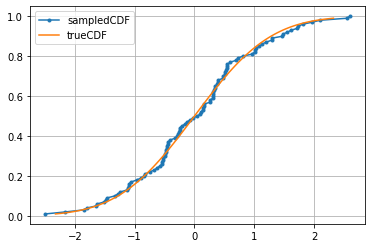

In [142]:

x = np.sort(distr.targetSamples)
x2 = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
n = x.size
y = [ind/n + (1/n) for ind, x in enumerate(x)]
plt.plot(x,y,marker=".",label="sampledCDF")
plt.plot(x2, norm.cdf(x2), linestyle="-", label="trueCDF")
plt.legend()
plt.grid(True)
plt.show()

## Now we'll try it with a sample size of 1000

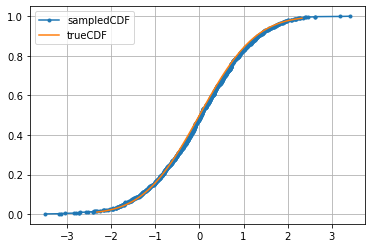

In [143]:
target = 1000
sample = np.random.exponential(scale=1, size=3*target)
distr = RejectionSampling(target, sample, f, g, M)
distr.rejectionSampling()
distr.makeNegative()
x = np.sort(distr.targetSamples)
x2 = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
n = x.size
y = [ind/n + (1/n) for ind, x in enumerate(x)]
plt.plot(x,y,marker=".",label="sampledCDF")
plt.plot(x2, norm.cdf(x2), linestyle="-", label="trueCDF")
plt.legend()
plt.grid(True)
plt.show()

## There is no difference visible